#第7章: 単語ベクトル

https://nlp100.github.io/ja/ch07.html

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

In [ ]:
!pwd
%cd /content/drive/My Drive/Colab Notebooks/NLP

/content
/content/drive/My Drive/Colab Notebooks/NLP


##課題60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

###解説
gensim は、トレーニング済みの単語ベクトルモデルを、KeyedVectorsデータとして、ロードする。

https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.load_word2vec_format

KeyedVectorは、単語をキーとし、そのベクトル表現を値とする辞書なので、ロードしたモデル[‘キー’]で単語ベクトルが取れる。

この課題では、https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM　にある、GoogleNews-vectors-negative300.bin.gz（1.5G）というGoogleがあらかじめ英単語に関してニューラルネットでトレーニングして作った単語ベクトルモデルを使う。従来、動的にダウンロードできたが、最近、Google　クラウド側からでかすぎると拒否られ、Windows側でもでかすぎてウィルスチェックできないと拒否られるようになってしまった。そこで、すでに入手してあるファイルで GoogleNews.bin.gz を現作業フォルダー（Google Drive）にあらかじめ置いておく。もしもローカルなディスク領域とクラウドのGoogle Driveとを同期とるように設定しているならば、ローカルとクラウドとで同期を済ませておく（時間かかります）。

###解答例

In [ ]:
#まず、GDriveをマウントして、カレントフォルダーを設定した後、データを以下のようにダウンロードします。
#以下、以前は動いていたが、今は動かない。あらかじめGoogleNews.bin.gzをカレントフォルダーに置くこと
#import gdown
#url = "https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM"
#output = 'GoogleNews.bin.gz'
#gdown.download(url, output, quiet=True)

'GoogleNews.bin.gz'

In [ ]:
#次に、単語ベクトルのモデルをロードし、‘United_States’のベクトルを取り出します。
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('./GoogleNews.bin.gz', binary=True)
print(model['United_States'])

##課題61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

###解説
準備、数学のスライドのベクトルの内積と、コサイン類似度を思い出してください。

gensimのmodel.most_similar(単語１,単語２)で、距離が取れる。
https://qiita.com/yoppe/items/512c7c072d08c64afa7e


###解答例

In [ ]:
model.similarity('United_States', 'U.S.')

0.73107743

##課題62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

###解説
gensimのmodel.most_similar(単語)で、近い単語が検索できる。
https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar

###解答例

In [ ]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

##課題63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ

###解説
gensimのmodel.most_similar(…)で、ベクトルの足し引きができる。
https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar

スペインの首都がマドリード、ギリシャの首都がアテネなので、スペインーマドリード＋アテネで、ギリシャが出てくれば成功。

###解答例

In [ ]:
print(model['Spain'] - model['madrid'] + model['Athens'])
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[ 1.82861328e-01 -2.95898438e-01  6.43920898e-03 -4.00878906e-01
  2.07031250e-01 -5.02929688e-02 -1.77001953e-01  6.83593750e-02
 -2.63671875e-01  5.08789062e-01 -3.82324219e-01  1.21093750e-01
  6.37695312e-01 -2.75360107e-01 -1.09619141e-01 -1.04614258e-01
 -4.67773438e-01 -2.12890625e-01  3.02734375e-01  2.81738281e-01
  3.66699219e-01  1.29882812e-01 -2.56835938e-01  1.46484375e-03
  1.24481201e-01  1.64794922e-01 -3.59375000e-01  1.46484375e-01
 -3.97460938e-01  6.25976562e-01  2.70996094e-01 -2.97119141e-01
 -2.66906738e-01  4.10156250e-02  2.44140625e-04 -4.12963867e-01
 -2.56835938e-01 -4.12597656e-01  2.31933594e-02 -3.55590820e-01
 -1.29394531e-02  5.26123047e-02  7.12890625e-02  2.54882812e-01
 -1.59545898e-01  4.48730469e-01 -9.41711426e-01  2.71240234e-01
  2.67517090e-01  2.37304688e-01  7.93457031e-03  1.86523438e-01
 -2.50366211e-01 -2.36206055e-01  1.25488281e-01  1.27960205e-01
 -4.04296875e-01  3.90625000e-02 -3.95324707e-01  4.29687500e-02
 -6.41784668e-02 -3.62304

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

##課題64. アナロジーデータでの実験 [やらなくていい]
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

###注
63番をたくさんやっているだけなのでスキップ。

###解答例

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt
!head -10 questions-words.txt

In [ ]:
with open('./questions-words-short.txt', 'r') as f1: #!!! use short data !!!
  for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':
      print('--------'+line[1]+'---------')
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      print(' '.join(line + [word, str(cos)]))

##課題65. アナロジータスクでの正解率 [やらなくていい]
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

###解答例

In [ ]:
num_sem = 0
corr_sem = 0
num_gram = 0
corr_gram = 0
flag = 1
with open('./questions-words-short.txt', 'r') as f1: #!!! use short data !!!
  for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':
      print('--------'+line[1]+'---------')
      if line[1].startswith('gram'): 
        flag =0
      else: 
        flag = 1
      continue
    word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
    if flag == 0:
      num_gram += 1
      if line[3]==word: 
        corr_gram += 1
        print('T: ' + ' '.join(line + [word, str(cos)]))
      else:
        print('F: ' + ' '.join(line + [word, str(cos)]))
    else:
      num_sem += 1
      if line[3]==word: 
        corr_sem += 1
        print('T: '+ ' '.join(line + [word, str(cos)]))
      else:
        print('F: ' + ' '.join(line + [word, str(cos)]))
print(f'意味的アナロジー正解率: {corr_sem/num_sem:.3f}')
print(f'文法的アナロジー正解率: {corr_gram/num_gram:.3f}') 

##課題66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ.

###解説
scipyパッケージにメソッドがあるのを使うので、やっていることの意味とメソッドのIOを押さえる。

SciPyは、Numpy, Pandas, Matplotlib を含むオープンソースパッケージ。

本家ホームページ　https://www.scipy.org/

解説　http://www.turbare.net/transl/scipy-lecture-notes/intro/scipy.html

スピアマン相関係数は、scipy.stats パッケージの spearmanrクラスを利用できる。

wordsim353は、二つの単語と、人がつけた類似スコアがコンマcsvで並んでいる。そのスコアと、model.similarityで得た値をspearmanrに食わせ、比較する。

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html　

ws353はただのリストなので、numpy.arrayに変換してから、spearmanrに渡す。

###解答例

In [ ]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2021-10-31 09:07:42--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2021-10-31 09:07:42--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.02s   

2021-10-31 09:07:42 (1.03 MB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
replace combined.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: co

In [ ]:
import numpy as np
from scipy.stats import spearmanr

ws353 = []
with open('./combined.csv', 'r') as f:
  next(f)
  for line in f:  # 1行ずつ読込み、単語ベクトルと類似度を計算
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)

npws = np.array(ws353)
correlation, _ = spearmanr(npws[:,2], npws[:,3])
print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685


##課題67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ

###解説

k-merasとwardクラスタリングは、数式での解説よりも直感的な説明のほうが、理解しやすいのでスライドおよび動画を見てください。

k-meansは、scikit-learnパッケージにメソッドがあるので、やっていることの意味とメソッドのIOを押さえる。
https://scikit-learn.org/stable/

国の名前は、 http://digitalmarketers.hatenablog.com/entry/2017/03/01/175121　などから。下の解答例の country_names データを利用してください。

KMeansは、 from sklearn.cluster import KMeans で。
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

出力は、labels_ というフィールドに入力データ個数のndarrayとして格納されている。
条件を満たすindexをとるには、numpy.where(条件)　を使うとよい。結果は、indexのndarrayのタプルなので、ndarrayを取り出すには[0]とかが必要。
https://note.nkmk.me/python-numpy-where/　

###解答例

In [ ]:
##http://digitalmarketers.hatenablog.com/entry/2017/03/01/175121

In [ ]:
countries = [
"United_States",
"Afghanistan",
"Albania",
"Algeria",
"Andorra",
"Angola",
#"Antigua_and_Barbuda",
"Argentina",
"Armenia",
"Australia",
"Austria",
"Azerbaijan",
"Bahamas",
"Bahrain",
"Bangladesh",
"Barbados",
"Belarus",
"Belgium",
"Belize",
"Benin",
"Bhutan",
"Bolivia",
#"Bosnia_and_Herzegovina",
"Botswana",
"Brazil",
"Brunei",
"Bulgaria",
"Burkina_Faso",
"Burundi",
"Cambodia",
"Cameroon",
"Canada",
"Cape_Verde",
#"Central_African_Republic",
"Chad",
"Chile",
"China",#"People's_Republic_of_China",
"Colombia",
"Comoros",
"Congo",#"Congo_-_Kinshasa",
#"Congo_-_Brazzaville",
"Costa_Rica",
#"Cote_d'Ivoire_(The_Ivory_Coast)",
"Croatia",
"Cuba",
"Cyprus",
"Czech_Republic",
"Denmark",
"Djibouti",
"Dominica",
"Dominican_Republic",
"Ecuador",
"Egypt",
"El_Salvador",
"Equatorial_Guinea",
"Eritrea",
"Estonia",
"Ethiopia",
"Fiji",
"Finland",
"France",
"Gabon",
"Gambia",
"Georgia",
"Germany",
"Ghana",
"Greece",
"Grenada",
"Guatemala",
"Guinea",
#"Guinea-Bissau",
"Guyana",
"Haiti",
"Honduras",
"Hungary",
"Iceland",
"India",
"Indonesia",
"Iran",
"Iraq",
"Ireland",
"Israel",
"Italy",
"Jamaica",
"Japan",
"Jordan",
"Kazakhstan",
"Kenya",
"Kiribati",
"North_Korea",
"South_Korea",
"Kuwait",
"Kyrgyzstan",
"Laos",
"Latvia",
"Lebanon",
"Lesotho",
"Liberia",
"Libya",
"Liechtenstein",
"Lithuania",
"Luxembourg",
"Macedonia",
"Madagascar",
"Malawi",
"Malaysia",
"Maldives",
"Mali",
"Malta",
"Marshall_Islands",
"Mauritania",
"Mauritius",
"Mexico",
"Micronesia",
"Moldova",
"Monaco",
"Mongolia",
"Montenegro",
"Morocco",
"Mozambique",
#Myanmar_(Burma)",
"Namibia",
"Nauru",
"Nepal",
"Netherlands",
"New_Zealand",
"Nicaragua",
"Niger",
"Nigeria",
"Norway",
"Oman",
"Pakistan",
"Palau",
"Panama",
#"Papua_New_Guinea",
"Paraguay",
"Peru",
"Philippines",
"Poland",
"Portugal",
"Qatar",
"Romania",
"Russia",
"Rwanda",
#"Saint_Kitts_and_Nevis",
"Saint_Lucia",
#"Saint_Vincent_and_the_Grenadines",
"Samoa",
"San_Marino",
#"Sao_Tome_and_Principe",
"Saudi_Arabia",
"Senegal",
"Serbia",
"Seychelles",
"Sierra_Leone",
"Singapore",
"Slovakia",
"Slovenia",
"Solomon_Islands",
"Somalia",
"South_Africa",
"Spain",
"Sri_Lanka",
"Sudan",
"Suriname",
"Swaziland",
"Sweden",
"Switzerland",
"Syria",
"Tajikistan",
"Tanzania",
"Thailand",
#"Timor-Leste_(East_Timor)",
"Togo",
"Tonga",
#"Trinidad_and_Tobago",
"Tunisia",
"Turkey",
"Turkmenistan",
"Tuvalu",
"Uganda",
"Ukraine",
"United_Arab_Emirates",
"United_Kingdom",
"Uruguay",
"Uzbekistan",
"Vanuatu",
#"Vatican_City",
"Venezuela",
"Vietnam",
"Yemen",
"Zambia",
"Zimbabwe",
"Abkhazia",
"Taiwan",
]

In [ ]:
from sklearn.cluster import KMeans

countries_vec = [model[country] for country in countries]
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
print(f'kmeans.labels: {kmeans.labels_}')
for i in range(5):
    print(f'cluster {i}\nkmeans.labels: {np.where(kmeans.labels_ == i)}')
    cluster = np.where(kmeans.labels_ == i)[0]
    print(', '.join([countries[k] for k in cluster]))

kmeans.labels: [2 2 3 0 3 0 1 3 2 3 3 4 2 2 4 3 3 4 0 2 1 0 1 2 3 0 0 2 0 2 0 0 1 2 1 0 0
 1 3 1 3 3 3 0 4 1 1 2 1 0 0 3 0 4 3 3 0 0 3 3 0 3 4 1 0 4 1 1 3 3 2 2 2 2
 3 2 3 4 2 2 3 0 4 2 2 2 3 2 3 2 0 0 0 3 3 3 3 0 0 2 4 0 3 4 0 4 1 4 3 3 2
 3 0 0 0 4 2 3 4 1 0 0 3 2 2 4 1 1 1 2 3 3 2 3 3 0 4 4 3 2 0 3 4 0 2 3 3 4
 0 0 3 2 0 1 0 3 3 2 3 0 2 0 4 0 3 3 4 0 3 2 2 1 3 4 1 2 0 0 0 3 2]
cluster 0
kmeans.labels: (array([  3,   5,  18,  21,  25,  26,  28,  30,  31,  35,  36,  43,  49,
        50,  52,  56,  57,  60,  64,  81,  90,  91,  92,  97,  98, 101,
       104, 112, 113, 114, 120, 121, 135, 140, 143, 148, 149, 152, 154,
       159, 161, 163, 167, 176, 177, 178]),)
Algeria, Angola, Benin, Botswana, Burkina_Faso, Burundi, Cameroon, Cape_Verde, Chad, Comoros, Congo, Djibouti, Equatorial_Guinea, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Morocco, Mozambique, Namibia, Niger, Nigeria, Rwanda, Senegal, Sierra_Leone, Soma

##課題68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

###解説
ワードクラスタリングは、scipyのものが利用できる。

scipy.cluster.hierarchy.linkage

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

第1引数に、国ベクトル（国数だけ、国のベクトル表現が並んだもの） を渡す。
第2引数で、階層クラスタリングのLogicを指定するが、そこにwardを指定する。

出力は、Linkage Matrixというクラスタ表現データである。

階層的クラスタリングした結果（Linkage Matrix）を、樹形図（デンドログラム）としてプロットするのは、

scipy.cluster.hierarchy.dendrogram

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

引数は、linkage Matrix。


###解答例

N is 180
14 and 77 (distance: 1.70)-> cluster 180 (2 children)
41 and 145 (distance: 1.82)-> cluster 181 (2 children)
21 and 177 (distance: 1.82)-> cluster 182 (2 children)
54 and 155 (distance: 1.86)-> cluster 183 (2 children)
8 and 118 (distance: 1.93)-> cluster 184 (2 children)
68 and 133 (distance: 1.94)-> cluster 185 (2 children)
42 and 122 (distance: 1.95)-> cluster 186 (2 children)
9 and 59 (distance: 1.98)-> cluster 187 (2 children)
48 and 63 (distance: 1.98)-> cluster 188 (2 children)
51 and 88 (distance: 1.99)-> cluster 189 (2 children)
15 and 168 (distance: 2.00)-> cluster 190 (2 children)
159 and 167 (distance: 2.02)-> cluster 191 (2 children)
16 and 117 (distance: 2.03)-> cluster 192 (2 children)
19 and 116 (distance: 2.08)-> cluster 193 (2 children)
38 and 146 (distance: 2.10)-> cluster 194 (2 children)
99 and 144 (distance: 2.10)-> cluster 195 (2 children)
7 and 10 (distance: 2.11)-> cluster 196 (2 children)
6 and 22 (distance: 2.12)-> cluster 197 (2 children)
46 and 128

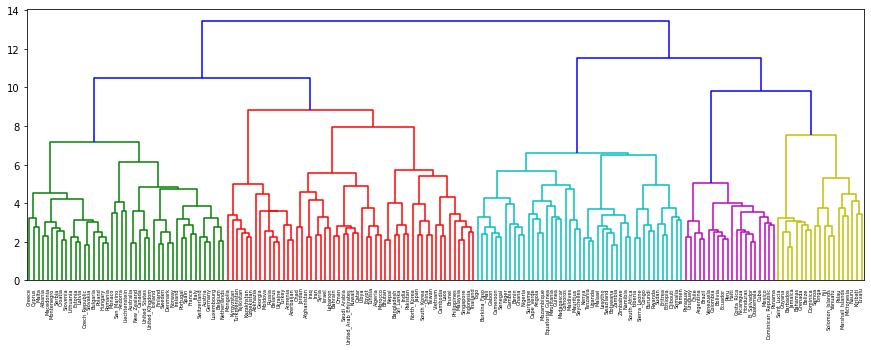

In [ ]:
#https://qiita.com/sho-matsuo/items/cd7f2b66e572bf60048b
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
hierachy = linkage(countries_vec, method='ward')
N = len(hierachy)
print(f'N is {N}')
for idx, link in enumerate(hierachy):
  print(f'{int(link[0])} and {int(link[1])} (distance: {link[2]:.2f})-> cluster {N+idx} ({int(link[3])} children)')
dendrogram(hierachy, labels=countries)
plt.show()

##課題69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ

###解説
t-SNEは、少し複雑なので、スライドおよび動画を見てください。

Scikit-Learnにt-SNE実装があるらしいが、bhtsneというのが評判らしい。

https://github.com/dominiek/python-bhtsne

出力は、2次元データのndarray。plt.scatterにxのリスト、yのリストを与える。

https://pythondatascience.plavox.info/matplotlib/%E6%95%A3%E5%B8%83%E5%9B%B3　

###解答例

In [ ]:
!pip install bhtsne

     |████████████████████████████████| 86 kB 2.9 MB/s 
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp37-cp37m-linux_x86_64.whl size=214575 sha256=879814ccb3228dfb1f1af692e94d3d7d63dd64508c17cc762a935d34aa9bdb03
  Stored in directory: /root/.cache/pip/wheels/e4/4c/71/26b7b0736d179d6bfe9d753629955515bf7ba7c1c8a8d98cb4
Successfully built bhtsne


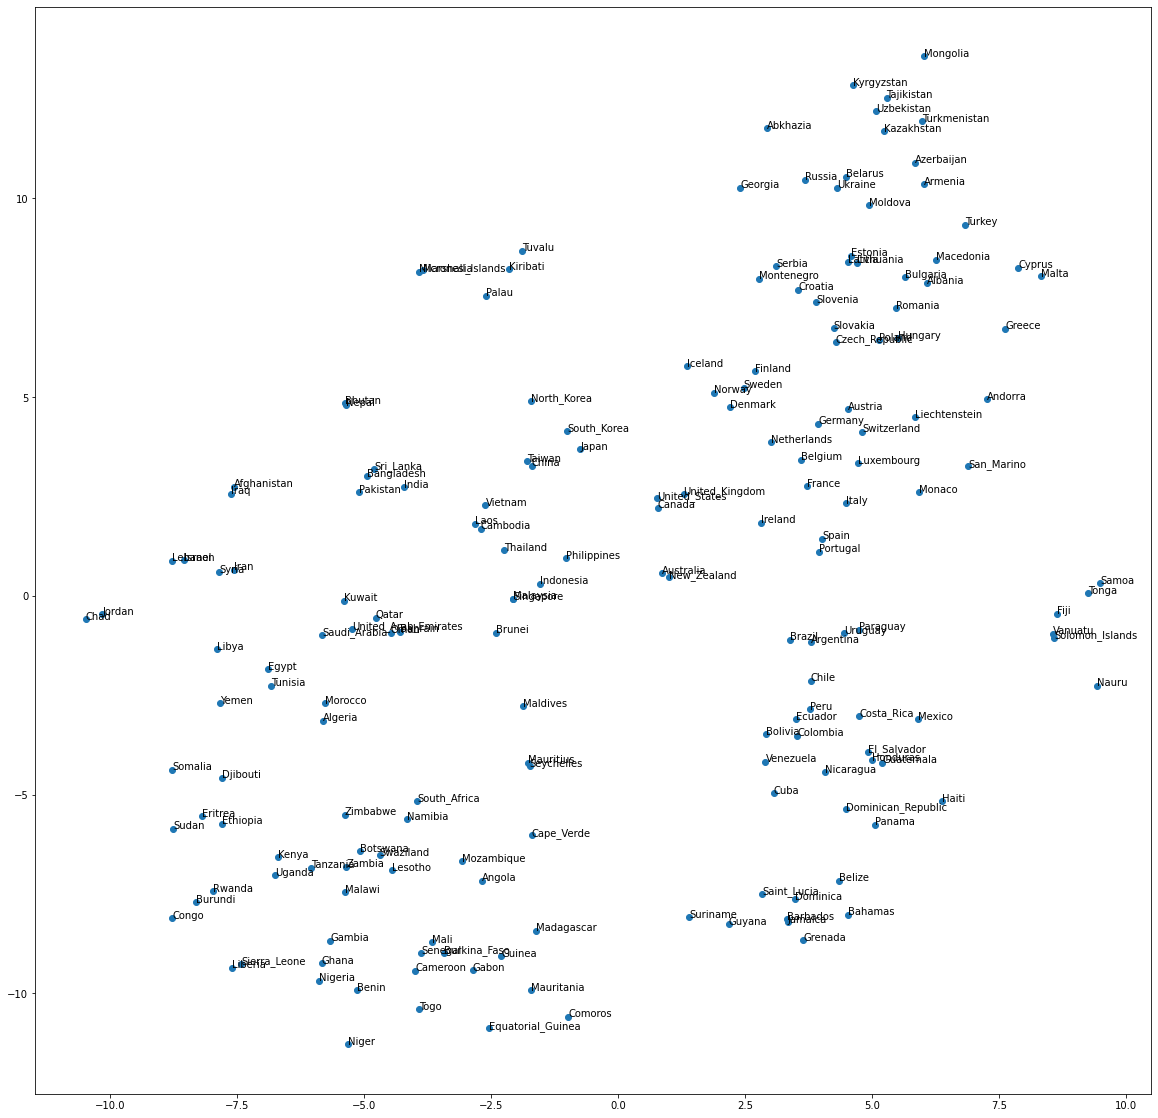

In [ ]:
import bhtsne

red = bhtsne.tsne(np.array(countries_vec).astype(np.float64))
plt.figure(figsize=(20, 20))
plt.scatter(red[:, 0], red[:, 1])
for (x, y), name in zip(red, countries):
    plt.annotate(name, (x, y))
plt.show()